In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import optuna
from imblearn.over_sampling import SMOTE

data= pd.read_csv('data_classification.csv')

In [2]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,AgeGroup
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,4
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,4
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,4
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,2
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1,3
289,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2,4
290,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3,3
291,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1,3


num: diagnosis of heart disease (angiographic disease status)
- Value 0: < 50% diameter narrowing
- Value 1: > 50% diameter narrowing
- (in any major vessel: attributes 59 through 68 are vessels)

Выделение целевого признака и предикторов

In [3]:
y = data["num"]
x = data.drop(["num"], axis=1)

Тип задачи мультиклассовая

In [4]:
y

0      0
1      2
2      1
3      0
4      0
      ..
288    1
289    2
290    3
291    1
292    0
Name: num, Length: 293, dtype: int64

In [5]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,AgeGroup
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,4
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,4
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,4
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,2
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,45,1,1,110,264,0,0,132,0,1.2,2,0,7,3
289,68,1,4,144,193,1,0,141,0,3.4,2,2,7,4
290,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
291,57,0,2,130,236,0,2,174,0,0.0,2,1,3,3


In [6]:
unique_classes = y.nunique()
unique_classes

5

Задача мультиклассовая, т.к. кол-во уникальных значений предсазываемого параметра 5

Делим данные на обучающую и тестовую выборки (80 на 20)

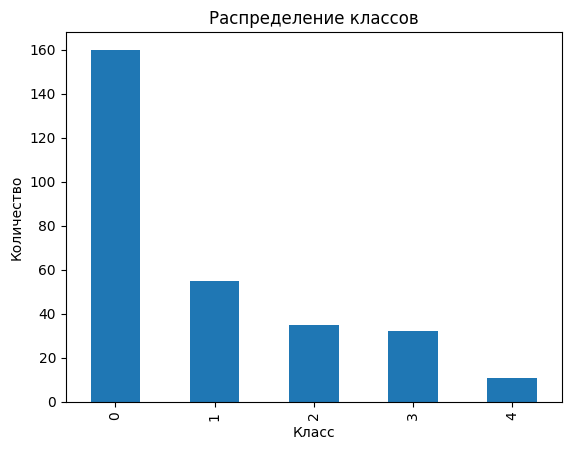

In [7]:
y.value_counts().plot(kind='bar')
plt.title('Распределение классов')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.show()

Классы несбалансированы, это может привести к проблема с предсказанием заболевания, поэтому сбалансируем

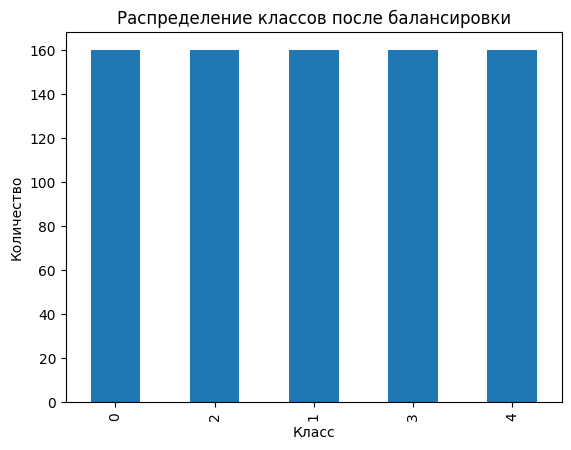

In [8]:
smote = SMOTE()

# Балансировка классов
x_res, y_res = smote.fit_resample(x, y)

# Проверим новый баланс классов
y_res.value_counts().plot(kind='bar')
plt.title('Распределение классов после балансировки')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.show()

In [9]:
x=x_res
y=y_res

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y_res, random_state=42)

In [11]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=10)

for train_index, test_index in kf.split(x, y):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    Y_train, Y_test = y.iloc[train_index], y.iloc[test_index]

Подберём гиперпараметры

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from scipy.stats import randint
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

Для SVM

In [13]:
# Параметры для подбора
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3],
    'gamma': ['scale'],
    'coef0': [0.0, 0.5, 1.0],
    'max_iter': [100000]
}

# Применение GridSearchCV для поиска гиперпараметров
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(x_train, y_train)

print("Best parameters from GridSearchCV:", grid_search.best_params_)

F:\Politex\ML\pycaret_env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
F:\Politex\ML\pycaret_env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
F:\Politex\ML\pycaret_env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
F:\Politex\ML\pycaret_env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
F:\Politex\ML\pycaret_env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated earl

Best parameters from GridSearchCV: {'C': 0.1, 'coef0': 0.0, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': 100000}


F:\Politex\ML\pycaret_env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best parameters from GridSearchCV: {'C': 0.1, 'coef0': 0.0, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': 100000}

In [14]:
param_dist = {
    'C': uniform(0.1, 10),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3],
    'gamma': ['scale'],
    'coef0': uniform(-1, 2),
    'max_iter': [100000]
}

# Применение RandomizedSearchCV
random_search = RandomizedSearchCV(SVC(), param_dist, n_iter=100, cv=5)
random_search.fit(x_train, y_train)

print("Best parameters from RandomizedSearchCV:", random_search.best_params_)

F:\Politex\ML\pycaret_env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
F:\Politex\ML\pycaret_env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
F:\Politex\ML\pycaret_env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
F:\Politex\ML\pycaret_env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
F:\Politex\ML\pycaret_env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated earl

Best parameters from RandomizedSearchCV: {'C': 1.8364067758609293, 'coef0': -0.8743703579807018, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': 100000}


F:\Politex\ML\pycaret_env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best parameters from RandomizedSearchCV:{'C': np.float64(1.6881966435833695), 'coef0': np.float64(-0.6522422683063076), 'degree': 2, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': 100000}

In [15]:
def objective(trial):
    # 1. Предлагаем гиперпараметры
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    C = trial.suggest_loguniform('C', 0.1, 50)
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])  # Добавили 'auto'
    
    # 2. Условные параметры (только для poly/sigmoid)
    if kernel == 'poly':
        degree = trial.suggest_int('degree', 2, 5)
    else:
        degree = 3  # Значение по умолчанию (не используется)
    
    if kernel in ['poly', 'sigmoid']:
        coef0 = trial.suggest_uniform('coef0', -1, 2)
    else:
        coef0 = 0.0  # Не используется для linear/rbf

    # 3. Создаём модель
    model = SVC(
        C=C,
        kernel=kernel,
        gamma=gamma,
        degree=degree,
        coef0=coef0,
        random_state=42,
        max_iter=100000
    )
    
    # 4. Оценка качества через кросс-валидацию
    return cross_val_score(model, x_train, y_train, n_jobs=-1, cv=3).mean()

# Оптимизация
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Лучшие параметры
print("Best parameters:", study.best_params)

[I 2025-05-18 21:29:11,075] A new study created in memory with name: no-name-96c8b984-d174-4726-86c3-57f22ff051c4
C:\Temp\ipykernel_19752\3303207602.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 50)
C:\Temp\ipykernel_19752\3303207602.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  coef0 = trial.suggest_uniform('coef0', -1, 2)
[I 2025-05-18 21:29:12,056] Trial 0 finished with value: 0.37974054085677095 and parameters: {'kernel': 'poly', 'C': 20.20348205144297, 'gamma': 'scale', 'degree': 2, 'coef0': -0.7461712653069024}. Best is trial 0 with value: 0.37974054085677095.
C:\Temp\ipykernel_19752\3303207602.py:4: FutureWarning: suggest_logunif

Best parameters: {'kernel': 'poly', 'C': 43.73078762634589, 'gamma': 'scale', 'degree': 5, 'coef0': 1.28800575010564}


Best is trial 14  with value: 0.58 {'kernel': 'rbf', 'C': 48.170475847826594, 'gamma': 'auto'}

Для SVС:
- Optuna: {'kernel': 'linear', 'C': 0.33234231730521396, 'gamma': 'scale'}
- RandomizedSearchCV:  {'C': np.float64(0.6647072984912038), 'coef0': np.float64(0.7217969763121443), 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': 100000}
- GridSearchCV: {'C': 0.1, 'coef0': 0.0, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': 100000}

Проверка гиперпараметров

Оценка модели: SVC
Accuracy: 0.6687
Precision (macro): 0.6628
Recall (macro): 0.6687
F1 (macro): 0.6590
Precision (weighted): 0.6628
Recall (weighted): 0.6687
F1 (weighted): 0.6590
ROC AUC Score (macro): 0.8514


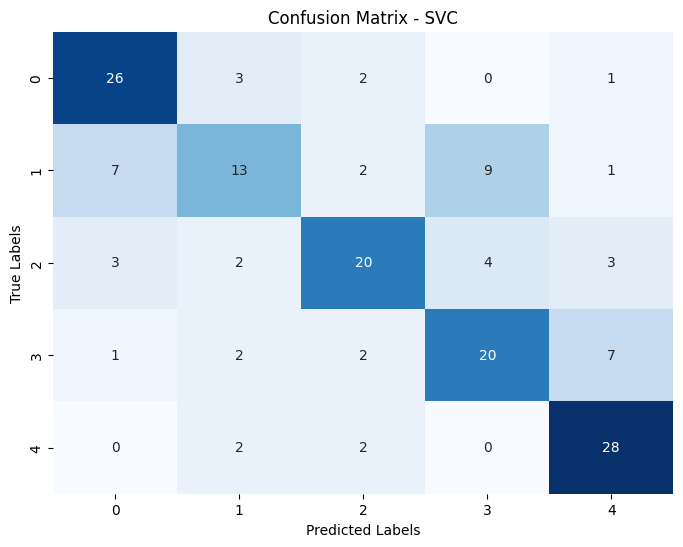

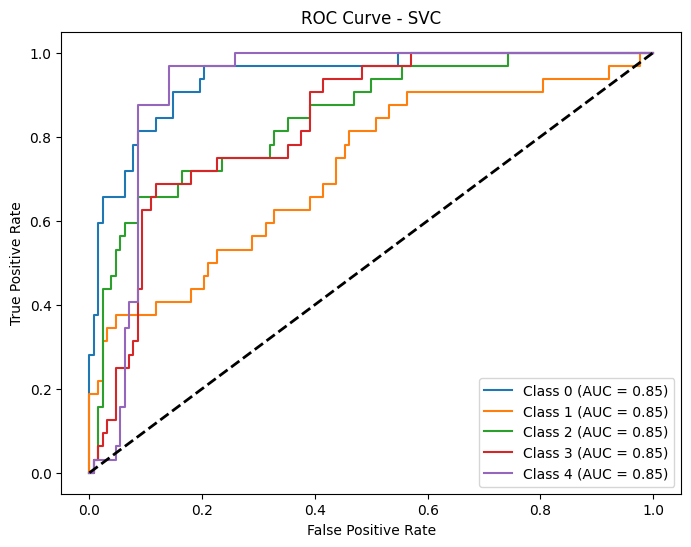

Оценка модели: SVC_With_K_foldd
Accuracy: 0.6375
Precision (macro): 0.6404
Recall (macro): 0.6375
F1 (macro): 0.6305
Precision (weighted): 0.6404
Recall (weighted): 0.6375
F1 (weighted): 0.6305
ROC AUC Score (macro): 0.8664


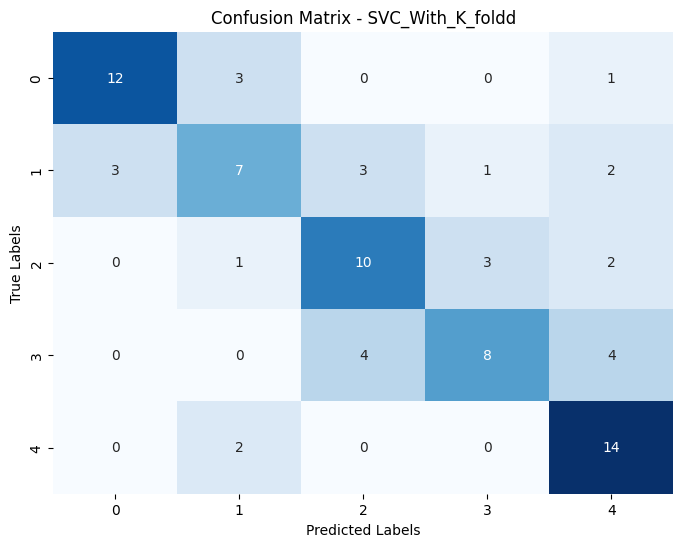

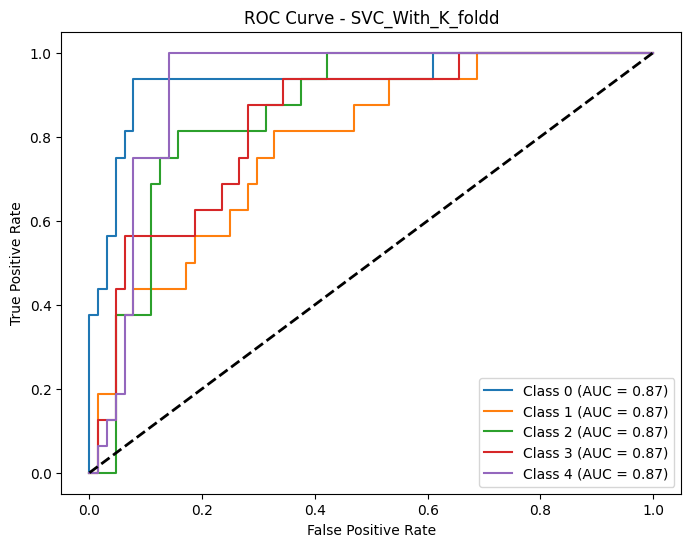

In [16]:
model_SVC = SVC(C=0.33, gamma='scale', random_state=42, kernel='linear')
model_SVC.fit(x_train, y_train)

y_pred_SVC=model_SVC.predict(x_test)

model_SVC_with = SVC(C=0.33, gamma='scale', random_state=42, kernel='linear')
model_SVC_with.fit(X_train, Y_train)

Y_pred_SVC_with=model_SVC_with.predict(X_test)

y_prob_SVC = model_SVC.decision_function(x_test)
y_prob_SVC_withh = model_SVC_with.decision_function(X_test)  

# Функция для вычисления и отображения метрик
def evaluate_model(y_test, y_pred, y_prob, model_name, num_classes):
    print(f"Оценка модели: {model_name}")
    
    accuracy = accuracy_score(y_test, y_pred)
    precision_macro = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall_macro = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1_macro = f1_score(y_test, y_pred, average='macro', zero_division=0)
    precision_weighted = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall_weighted = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1_weighted = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (macro): {precision_macro:.4f}")
    print(f"Recall (macro): {recall_macro:.4f}")
    print(f"F1 (macro): {f1_macro:.4f}")
    print(f"Precision (weighted): {precision_weighted:.4f}")
    print(f"Recall (weighted): {recall_weighted:.4f}")
    print(f"F1 (weighted): {f1_weighted:.4f}")
    y_test_bin = label_binarize(y_test, classes=range(num_classes))
    roc_auc = roc_auc_score(y_test_bin, y_prob, average='macro', multi_class='ovr')
    print(f"ROC AUC Score (macro): {roc_auc:.4f}")
    
    # Матрица ошибок
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=range(num_classes), yticklabels=range(num_classes))
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
        
    # ROC Curve
    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
        
    plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Диагональ (случайный классификатор)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

num_classes = len(set(y_test))  # Определяем количество классов в задаче
evaluate_model(y_test, y_pred_SVC, y_prob_SVC, 'SVC', num_classes)

evaluate_model(Y_test, Y_pred_SVC_with, y_prob_SVC_withh, 'SVC_With_K_foldd', num_classes)

Для нелинейного SVC

In [17]:
# Параметры для подбора
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'degree': [2, 3],
    'gamma': ['scale'],
    'coef0': [0.0, 0.5, 1.0],
    'max_iter': [100000]
}

# Применение GridSearchCV для поиска гиперпараметров
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(x_train, y_train)

print("Best parameters from GridSearchCV:", grid_search.best_params_)

Best parameters from GridSearchCV: {'C': 10, 'coef0': 1.0, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': 100000}


Best parameters from GridSearchCV: {'C': 10, 'coef0': 1.0, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': 100000}

In [18]:
param_dist = {
    'C': uniform(0.1, 10),
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'degree': [2, 3],
    'gamma': ['scale'],
    'coef0': uniform(-1, 2),
    'max_iter': [100000]
}

# Применение RandomizedSearchCV
random_search = RandomizedSearchCV(SVC(), param_dist, n_iter=100, cv=5)
random_search.fit(x_train, y_train)

print("Best parameters from RandomizedSearchCV:", random_search.best_params_)

Best parameters from RandomizedSearchCV: {'C': 8.193993708830195, 'coef0': 0.7980117141087739, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': 100000}


Best parameters from RandomizedSearchCV: {'C': np.float64(9.301826267020235), 'coef0': np.float64(0.3183967237362635), 'degree': 3, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': 100000}

In [19]:
def objective(trial):
    # 1. Предлагаем гиперпараметры
    kernel = trial.suggest_categorical('kernel', ['poly', 'rbf', 'sigmoid'])
    C = trial.suggest_loguniform('C', 0.1, 50)
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])  # Добавили 'auto'
    
    # 2. Условные параметры (только для poly/sigmoid)
    if kernel == 'poly':
        degree = trial.suggest_int('degree', 2, 5)
    else:
        degree = 3  # Значение по умолчанию (не используется)
    
    if kernel in ['poly', 'sigmoid']:
        coef0 = trial.suggest_uniform('coef0', -1, 2)
    else:
        coef0 = 0.0  # Не используется для linear/rbf

    # 3. Создаём модель
    model = SVC(
        C=C,
        kernel=kernel,
        gamma=gamma,
        degree=degree,
        coef0=coef0,
        random_state=42,
        max_iter=100000
    )
    
    # 4. Оценка качества через кросс-валидацию
    return cross_val_score(model, x_train, y_train, n_jobs=-1, cv=3).mean()

# Оптимизация
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Лучшие параметры
print("Best parameters:", study.best_params)

[I 2025-05-18 21:29:53,989] A new study created in memory with name: no-name-f9bcb04c-c337-4478-b7db-39855f79b85e
C:\Temp\ipykernel_19752\2669953731.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 50)
C:\Temp\ipykernel_19752\2669953731.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  coef0 = trial.suggest_uniform('coef0', -1, 2)
[I 2025-05-18 21:29:54,025] Trial 0 finished with value: 0.22973980957395465 and parameters: {'kernel': 'sigmoid', 'C': 1.1750192394166201, 'gamma': 'scale', 'coef0': 1.8136615273795273}. Best is trial 0 with value: 0.22973980957395465.
C:\Temp\ipykernel_19752\2669953731.py:4: FutureWarning: suggest_loguniform has be

Best parameters: {'kernel': 'rbf', 'C': 9.525563130430065, 'gamma': 'auto'}


Итог:
Optuna: {'kernel': 'rbf', 'C': 27.511612377968536, 'gamma': 'auto'}
RandomSearch: {'C': np.float64(9.301826267020235), 'coef0': np.float64(0.3183967237362635), 'degree': 3, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': 100000}
Grid: {'C': 10, 'coef0': 1.0, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': 100000}

Оценка модели: SVM
Accuracy: 0.6562
Precision (macro): 0.8548
Recall (macro): 0.6562
F1 (macro): 0.6847
Precision (weighted): 0.8548
Recall (weighted): 0.6562
F1 (weighted): 0.6847
ROC AUC Score (macro): 0.9368


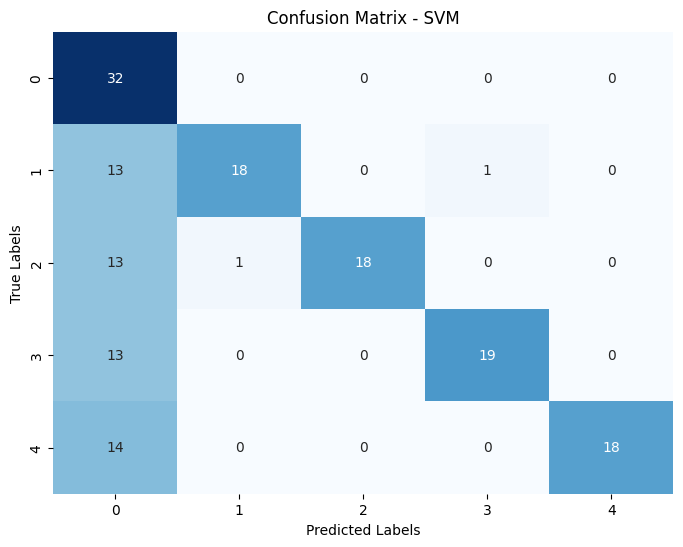

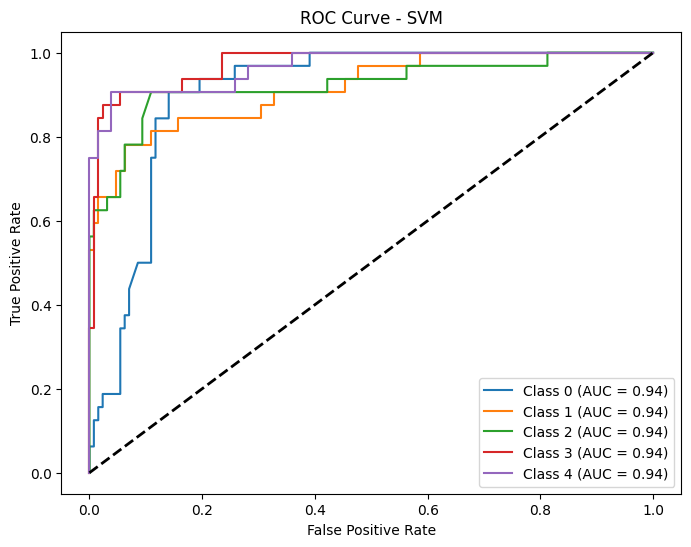

Оценка модели: SVM_With_K_foldd
Accuracy: 0.7000
Precision (macro): 0.8800
Recall (macro): 0.7000
F1 (macro): 0.7274
Precision (weighted): 0.8800
Recall (weighted): 0.7000
F1 (weighted): 0.7274
ROC AUC Score (macro): 0.9525


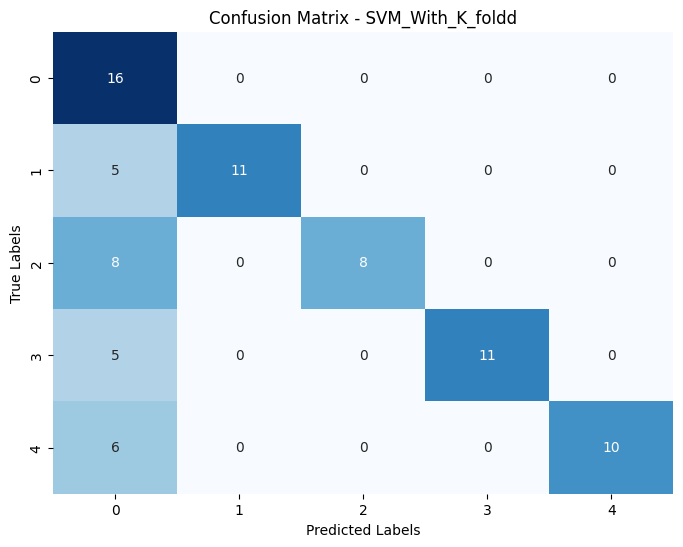

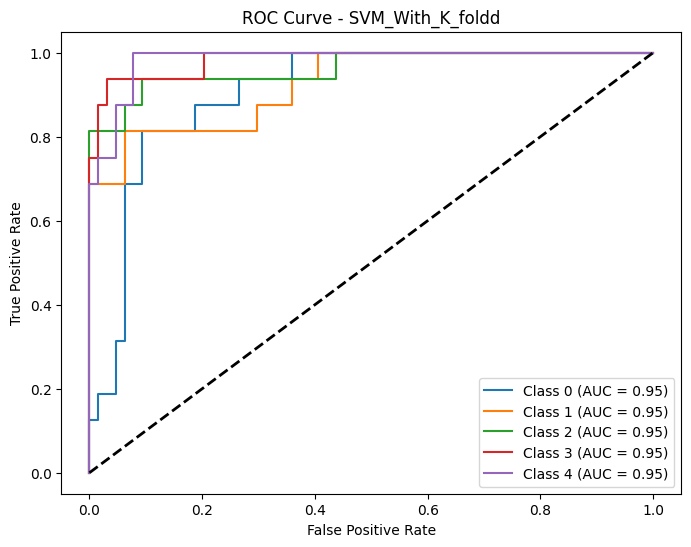

In [20]:
model_SVM = SVC(kernel='rbf', C=27, gamma='auto', random_state=42)
model_SVM.fit(x_train, y_train)

y_pred_SVM=model_SVM.predict(x_test)

model_SVM_with = SVC(kernel='rbf', C=27, gamma='auto', random_state=42)
model_SVM_with.fit(X_train, Y_train)

Y_pred_SVM_with=model_SVM_with.predict(X_test)

y_prob_SVM = model_SVM.decision_function(x_test)
y_prob_SVM_with = model_SVM_with.decision_function(X_test)  

# Функция для вычисления и отображения метрик
def evaluate_model(y_test, y_pred, y_prob, model_name, num_classes):
    print(f"Оценка модели: {model_name}")
    
    accuracy = accuracy_score(y_test, y_pred)
    precision_macro = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall_macro = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1_macro = f1_score(y_test, y_pred, average='macro', zero_division=0)
    precision_weighted = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall_weighted = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1_weighted = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (macro): {precision_macro:.4f}")
    print(f"Recall (macro): {recall_macro:.4f}")
    print(f"F1 (macro): {f1_macro:.4f}")
    print(f"Precision (weighted): {precision_weighted:.4f}")
    print(f"Recall (weighted): {recall_weighted:.4f}")
    print(f"F1 (weighted): {f1_weighted:.4f}")
    y_test_bin = label_binarize(y_test, classes=range(num_classes))
    roc_auc = roc_auc_score(y_test_bin, y_prob, average='macro', multi_class='ovr')
    print(f"ROC AUC Score (macro): {roc_auc:.4f}")
    
    # Матрица ошибок
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=range(num_classes), yticklabels=range(num_classes))
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
        
    # ROC Curve
    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
        
    plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Диагональ (случайный классификатор)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

num_classes = len(set(y_test))  # Определяем количество классов в задаче
evaluate_model(y_test, y_pred_SVM, y_prob_SVM, 'SVM', num_classes)

evaluate_model(Y_test, Y_pred_SVM_with, y_prob_SVM_with, 'SVM_With_K_foldd', num_classes)

Для Logistic Regression

In [21]:
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],  # разные решатели
    'max_iter': [100, 200, 300, 100000]
}

# Создание и запуск GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Лучшие параметры
print("Best parameters for Logistic Regression:", grid_search.best_params_)

F:\Politex\ML\pycaret_env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
F:\Politex\ML\pycaret_env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
F:\Politex\ML\pycaret_env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
F:\Politex\ML\pycaret_env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
F:\Politex\ML\pycaret_env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
F:\Politex\ML\pycaret_env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max

Best parameters for Logistic Regression: {'C': 10, 'max_iter': 100, 'solver': 'liblinear'}


Best parameters for Logistic Regression: {'C': 1, 'max_iter': 100, 'solver': 'liblinear'}

In [22]:
param_dist = {
    'C': uniform(0.01, 10),  # рандомизированное распределение
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300, 100000]
}

# Создание и запуск RandomizedSearchCV
random_search = RandomizedSearchCV(LogisticRegression(), param_distributions=param_dist, n_iter=50, cv=5, random_state=42)
random_search.fit(x_train, y_train)

# Лучшие параметры
print("Best parameters for Logistic Regression using RandomizedSearchCV:", random_search.best_params_)

F:\Politex\ML\pycaret_env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
F:\Politex\ML\pycaret_env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
F:\Politex\ML\pycaret_env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
F:\Politex\ML\pycaret_env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
F:\Politex\ML\pycaret_env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
F:\Politex\ML\pycaret_env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max

Best parameters for Logistic Regression using RandomizedSearchCV: {'C': 5.988999788110851, 'max_iter': 100000, 'solver': 'liblinear'}


F:\Politex\ML\pycaret_env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
F:\Politex\ML\pycaret_env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters for Logistic Regression using RandomizedSearchCV: {'C': np.float64(6.085448519014383), 'max_iter': 100, 'solver': 'liblinear'}

In [23]:
def objective(trial):
    C = trial.suggest_loguniform('C', 1e-5, 1e5)
    solver = trial.suggest_categorical('solver', ['liblinear', 'saga'])
    max_iter = trial.suggest_int('max_iter', 100, 300, 100000)
    
    model = LogisticRegression(C=C, solver=solver, max_iter=max_iter)
    return cross_val_score(model, x_train, y_train, cv=5, n_jobs=-1).mean()

# Создание и запуск оптимизации
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Лучшие гиперпараметры
print("Best parameters for Logistic Regression using Optuna:", study.best_params)

[I 2025-05-18 21:31:10,168] A new study created in memory with name: no-name-c3e131ee-e029-421f-9e7b-593272a8af73
C:\Temp\ipykernel_19752\3867407596.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e5)
C:\Temp\ipykernel_19752\3867407596.py:4: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  max_iter = trial.suggest_int('max_iter', 100, 300, 100000)
F:\Politex\ML\pycaret_env\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [100, 300] and step=100000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
[I 2025-05-18 21:31:10,210] Trial 0 finished with value: 0.5390625 and parameters: {'C': 63.18903910729309, 'solver': 'liblinea

Best parameters for Logistic Regression using Optuna: {'C': 9.453821755343332, 'solver': 'liblinear', 'max_iter': 100}


Для Logistic Regression:
- Optuna: {'C': 66578.33705324291, 'solver': 'liblinear', 'max_iter': 100}
- RandomizedSearchCV: {'C': np.float64(6.085448519014383), 'max_iter': 100, 'solver': 'liblinear'}
- GridSearchCV: {'C': 1, 'max_iter': 100, 'solver': 'liblinear'}

Оценка модели: LogisticRegression
Accuracy: 0.6188
Precision (macro): 0.6160
Recall (macro): 0.6188
F1 (macro): 0.6128
Precision (weighted): 0.6160
Recall (weighted): 0.6188
F1 (weighted): 0.6128
ROC AUC Score (macro): 0.8600


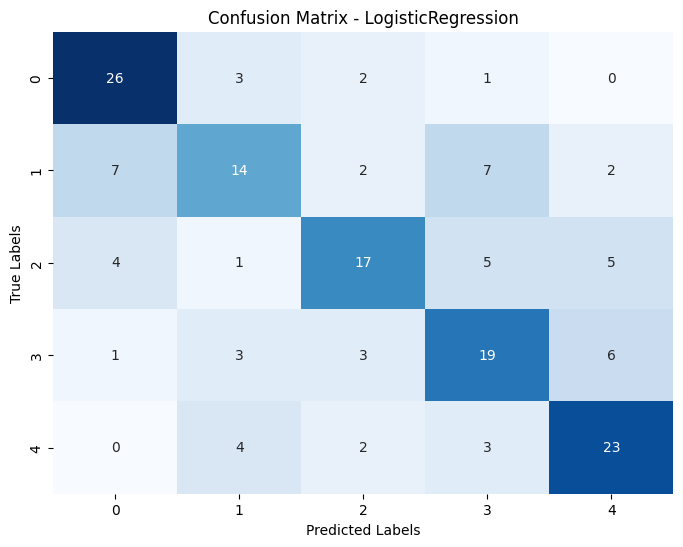

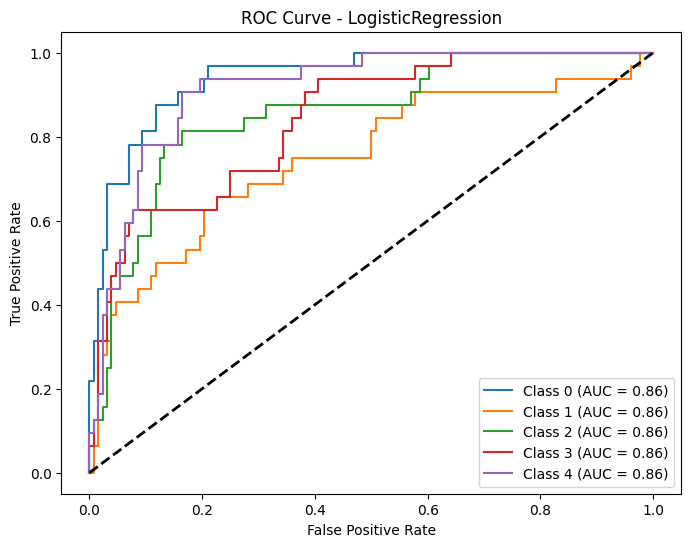

Оценка модели: LR_With_K_foldd
Accuracy: 0.5875
Precision (macro): 0.6019
Recall (macro): 0.5875
F1 (macro): 0.5813
Precision (weighted): 0.6019
Recall (weighted): 0.5875
F1 (weighted): 0.5813
ROC AUC Score (macro): 0.8660


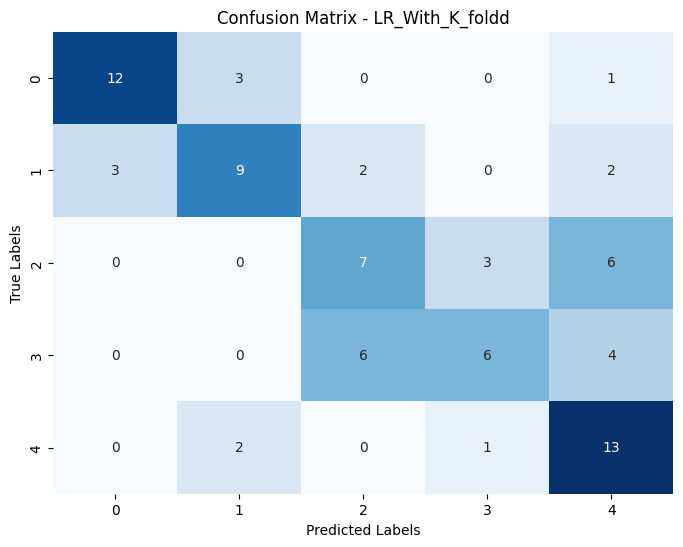

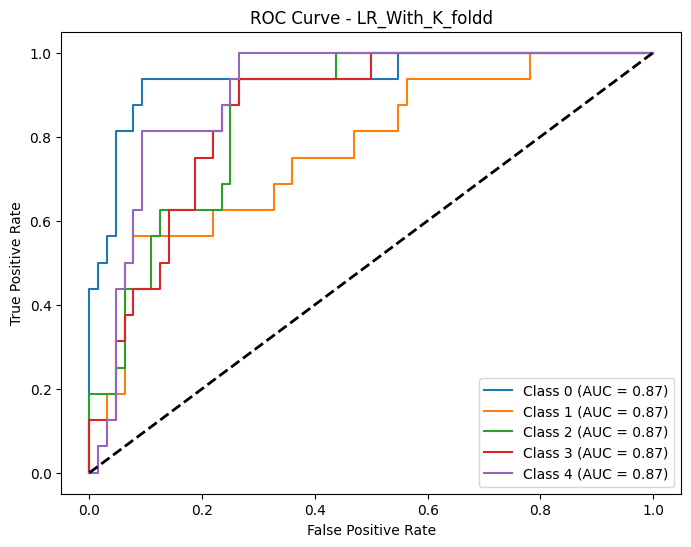

In [24]:
model_LR_with = LogisticRegression(C=66578, solver='liblinear', max_iter=100)
model_LR_with.fit(X_train, Y_train)

model_LR = LogisticRegression(C=66578, solver='liblinear', max_iter=100)
model_LR.fit(x_train, y_train)

y_prob_LR = model_LR.predict_proba(x_test)  # Для LogisticRegression
y_prob_LR_with = model_LR_with.predict_proba(X_test)  

y_pred_LR=model_LR.predict(x_test)
Y_pred_LR_with=model_LR_with.predict(X_test)

# Функция для вычисления и отображения метрик
def evaluate_model(y_test, y_pred, y_prob, model_name, num_classes):
    print(f"Оценка модели: {model_name}")
    
    accuracy = accuracy_score(y_test, y_pred)
    precision_macro = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall_macro = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1_macro = f1_score(y_test, y_pred, average='macro', zero_division=0)
    precision_weighted = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall_weighted = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1_weighted = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (macro): {precision_macro:.4f}")
    print(f"Recall (macro): {recall_macro:.4f}")
    print(f"F1 (macro): {f1_macro:.4f}")
    print(f"Precision (weighted): {precision_weighted:.4f}")
    print(f"Recall (weighted): {recall_weighted:.4f}")
    print(f"F1 (weighted): {f1_weighted:.4f}")
    y_test_bin = label_binarize(y_test, classes=range(num_classes))
    roc_auc = roc_auc_score(y_test_bin, y_prob, average='macro', multi_class='ovr')
    print(f"ROC AUC Score (macro): {roc_auc:.4f}")
    
    # Матрица ошибок
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=range(num_classes), yticklabels=range(num_classes))
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
        
    # ROC Curve
    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
        
    plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Диагональ (случайный классификатор)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

num_classes = len(set(y_test))  # Определяем количество классов в задаче
evaluate_model(y_test, y_pred_LR, y_prob_LR, 'LogisticRegression', num_classes)
evaluate_model(Y_test, Y_pred_LR_with, y_prob_LR_with, 'LR_With_K_foldd', num_classes)

Для k-Nearest Neighbors

In [25]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'weights': ['uniform', 'distance']
}

# Создание и запуск GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Лучшие параметры
print("Best parameters for kNN:", grid_search.best_params_)

Best parameters for kNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


Best parameters for kNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

In [26]:
param_dist = {
    'n_neighbors': randint(3, 20),
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'weights': ['uniform', 'distance']
}

# Создание и запуск RandomizedSearchCV
random_search = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_dist, n_iter=50, cv=5, random_state=42)
random_search.fit(x_train, y_train)

# Лучшие параметры
print("Best parameters for kNN using RandomizedSearchCV:", random_search.best_params_)

Best parameters for kNN using RandomizedSearchCV: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


Best parameters for kNN using RandomizedSearchCV: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

In [27]:
def objective(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 3, 20)
    metric = trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'minkowski'])
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    
    model = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric, weights=weights)
    return cross_val_score(model, x_train, y_train, cv=5, n_jobs=-1).mean()

# Создание и запуск оптимизации
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Лучшие гиперпараметры
print("Best parameters for kNN using Optuna:", study.best_params)

[I 2025-05-18 21:31:18,760] A new study created in memory with name: no-name-19863c6b-4f01-452a-9d7e-39a85f7ccc81
[I 2025-05-18 21:31:18,809] Trial 0 finished with value: 0.684375 and parameters: {'n_neighbors': 3, 'metric': 'euclidean', 'weights': 'uniform'}. Best is trial 0 with value: 0.684375.
[I 2025-05-18 21:31:18,854] Trial 1 finished with value: 0.60625 and parameters: {'n_neighbors': 11, 'metric': 'minkowski', 'weights': 'uniform'}. Best is trial 0 with value: 0.684375.
[I 2025-05-18 21:31:18,880] Trial 2 finished with value: 0.5390625 and parameters: {'n_neighbors': 19, 'metric': 'minkowski', 'weights': 'uniform'}. Best is trial 0 with value: 0.684375.
[I 2025-05-18 21:31:18,905] Trial 3 finished with value: 0.6328125 and parameters: {'n_neighbors': 7, 'metric': 'minkowski', 'weights': 'uniform'}. Best is trial 0 with value: 0.684375.
[I 2025-05-18 21:31:18,931] Trial 4 finished with value: 0.6890625 and parameters: {'n_neighbors': 6, 'metric': 'manhattan', 'weights': 'unifor

Best parameters for kNN using Optuna: {'n_neighbors': 3, 'metric': 'manhattan', 'weights': 'distance'}


Best parameters for kNN using Optuna: {'n_neighbors': 3, 'metric': 'manhattan', 'weights': 'distance'}

Для k-Nearest Neighbors:
- Optuna: 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'
- RandomizedSearchCV: 'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'distance'
- GridSearchCV: 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'

Оценка модели: KNeighbors
Accuracy: 0.7438
Precision (macro): 0.7320
Recall (macro): 0.7438
F1 (macro): 0.7307
Precision (weighted): 0.7320
Recall (weighted): 0.7438
F1 (weighted): 0.7307
ROC AUC Score (macro): 0.9229


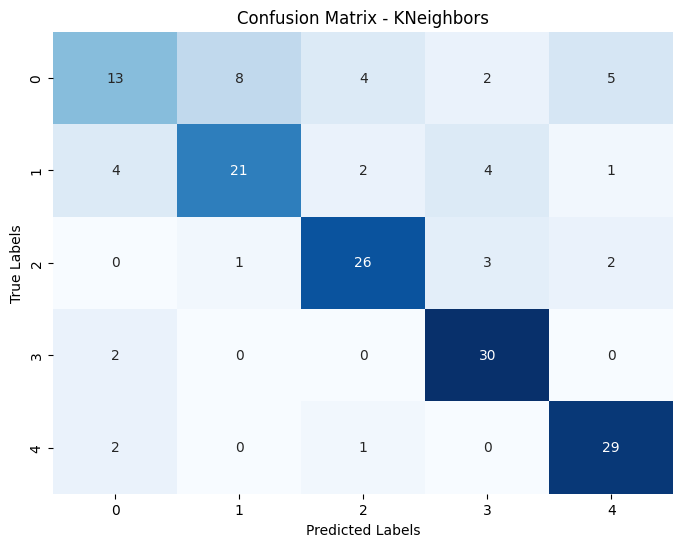

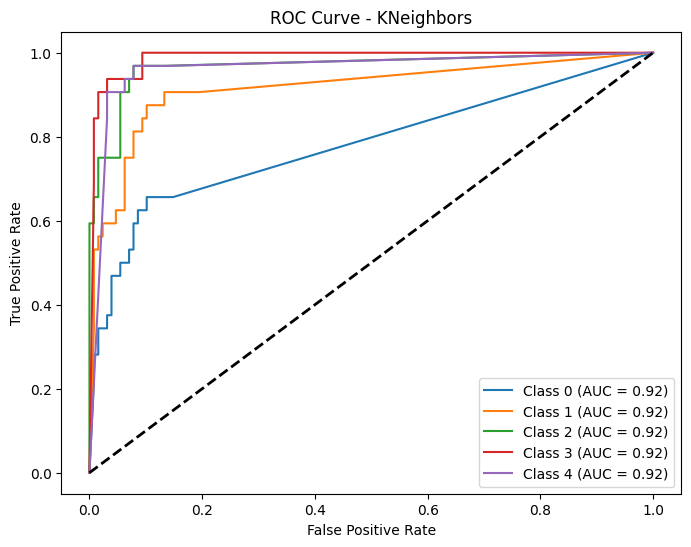

Оценка модели: KNN_With_K_foldd
Accuracy: 0.8500
Precision (macro): 0.8646
Recall (macro): 0.8500
F1 (macro): 0.8397
Precision (weighted): 0.8646
Recall (weighted): 0.8500
F1 (weighted): 0.8397
ROC AUC Score (macro): 0.9460


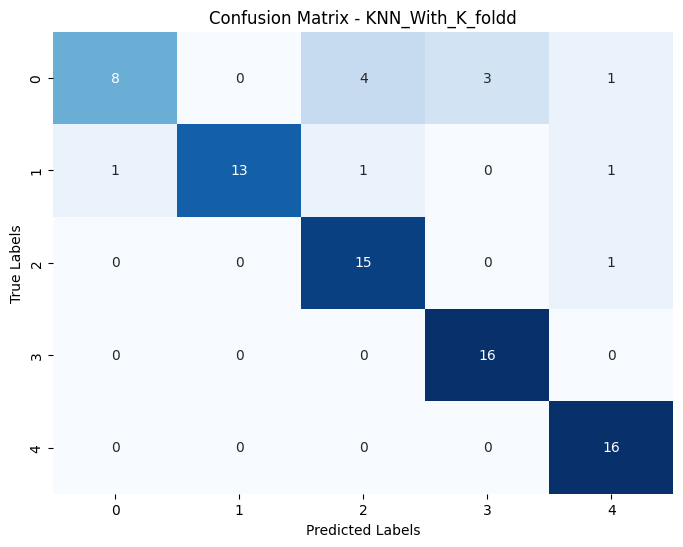

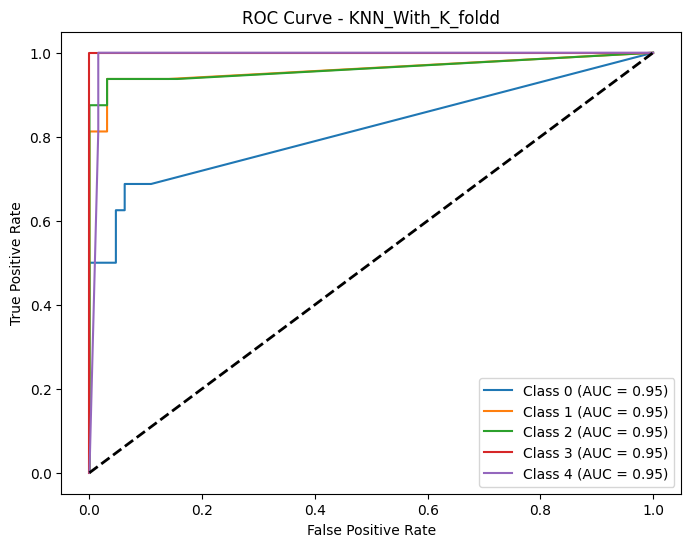

In [28]:
model_KNN_with = KNeighborsClassifier(n_neighbors=3, metric='manhattan', weights='distance')
model_KNN_with.fit(X_train, Y_train)

model_KNN = KNeighborsClassifier(n_neighbors=3, metric='manhattan', weights='distance')
model_KNN.fit(x_train, y_train)

y_prob_KNN = model_KNN.predict_proba(x_test)
y_prob_KNN_with = model_KNN_with.predict_proba(X_test) 

y_pred_KNN=model_KNN.predict(x_test)
Y_pred_KNN_with=model_KNN_with.predict(X_test)

# Функция для вычисления и отображения метрик
def evaluate_model(y_test, y_pred, y_prob, model_name, num_classes):
    print(f"Оценка модели: {model_name}")
    
    accuracy = accuracy_score(y_test, y_pred)
    precision_macro = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall_macro = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1_macro = f1_score(y_test, y_pred, average='macro', zero_division=0)
    precision_weighted = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall_weighted = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1_weighted = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (macro): {precision_macro:.4f}")
    print(f"Recall (macro): {recall_macro:.4f}")
    print(f"F1 (macro): {f1_macro:.4f}")
    print(f"Precision (weighted): {precision_weighted:.4f}")
    print(f"Recall (weighted): {recall_weighted:.4f}")
    print(f"F1 (weighted): {f1_weighted:.4f}")
    y_test_bin = label_binarize(y_test, classes=range(num_classes))
    roc_auc = roc_auc_score(y_test_bin, y_prob, average='macro', multi_class='ovr')
    print(f"ROC AUC Score (macro): {roc_auc:.4f}")
    
    # Матрица ошибок
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=range(num_classes), yticklabels=range(num_classes))
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
        
    # ROC Curve
    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
        
    plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Диагональ (случайный классификатор)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

num_classes = len(set(y_test))
evaluate_model(y_test, y_pred_KNN, y_prob_KNN, 'KNeighbors', num_classes)

evaluate_model(Y_test, Y_pred_KNN_with, y_prob_KNN_with, 'KNN_With_K_foldd', num_classes)

Для Naive Bayes

In [29]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

# Создание и запуск GridSearchCV
grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Лучшие параметры
print("Best parameters for Naive Bayes:", grid_search.best_params_)

Best parameters for Naive Bayes: {'var_smoothing': 1e-06}


Best parameters for Naive Bayes: {'var_smoothing': 1e-06}

In [30]:
param_dist = {
    'var_smoothing': uniform(1e-9, 1e-6)
}

# Создание и запуск RandomizedSearchCV
random_search = RandomizedSearchCV(GaussianNB(), param_distributions=param_dist, n_iter=50, cv=5, random_state=42)
random_search.fit(x_train, y_train)

# Лучшие параметры
print("Best parameters for Naive Bayes using RandomizedSearchCV:", random_search.best_params_)

Best parameters for Naive Bayes using RandomizedSearchCV: {'var_smoothing': 9.517143064099161e-07}


Best parameters for Naive Bayes using RandomizedSearchCV: {'var_smoothing': np.float64(9.517143064099161e-07)}

In [31]:
def objective(trial):
    var_smoothing = trial.suggest_loguniform('var_smoothing', 1e-9, 1e-6)
    
    model = GaussianNB(var_smoothing=var_smoothing)
    return cross_val_score(model, x_train, y_train, cv=5, n_jobs=-1).mean()

# Создание и запуск оптимизации
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Лучшие гиперпараметры
print("Best parameters for Naive Bayes using Optuna:", study.best_params)

[I 2025-05-18 21:31:23,855] A new study created in memory with name: no-name-9e554658-08ec-4263-90fb-9a4f34569e08
C:\Temp\ipykernel_19752\3216424393.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  var_smoothing = trial.suggest_loguniform('var_smoothing', 1e-9, 1e-6)
[I 2025-05-18 21:31:23,881] Trial 0 finished with value: 0.459375 and parameters: {'var_smoothing': 1.3622330634499356e-08}. Best is trial 0 with value: 0.459375.
C:\Temp\ipykernel_19752\3216424393.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  var_smoothing = trial.suggest_loguniform('var_smoothing', 1e-9, 1e-6)
[I 2025-05-18 21:31:23,897] Trial 1 finished with value: 0.459375 and parameters: {'var

Best parameters for Naive Bayes using Optuna: {'var_smoothing': 9.391042054761677e-07}


Best parameters for Naive Bayes using Optuna: {'var_smoothing': 9.58596133303527e-07}

Для Naive Bayes:
- Optuna: 'var_smoothing': 9.910359183938845e-07
- RandomizedSearchCV: 'var_smoothing': np.float64(9.517143064099161e-07
- GridSearchCV: 'var_smoothing': 1e-06

Оценка модели: GaussianNB
Accuracy: 0.4313
Precision (macro): 0.4193
Recall (macro): 0.4313
F1 (macro): 0.4058
Precision (weighted): 0.4193
Recall (weighted): 0.4313
F1 (weighted): 0.4058
ROC AUC Score (macro): 0.7899


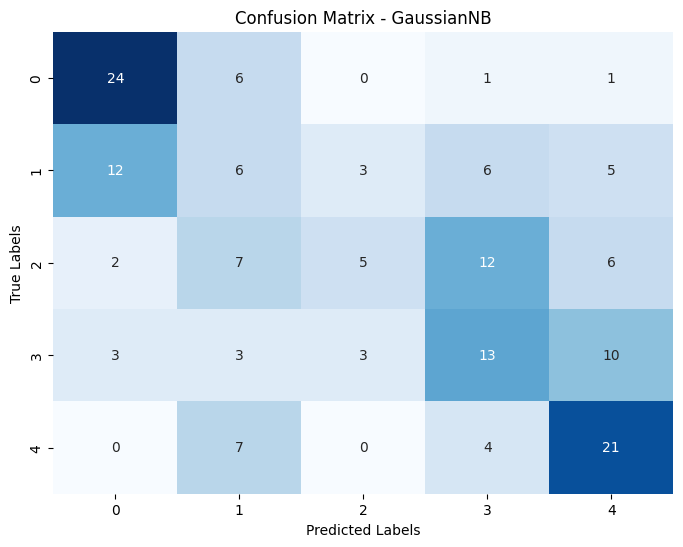

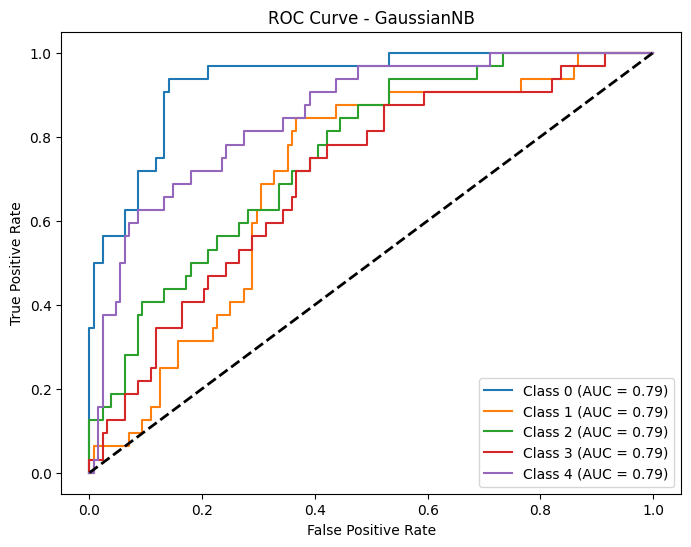

Оценка модели: GNB_With_K_foldd
Accuracy: 0.4750
Precision (macro): 0.4775
Recall (macro): 0.4750
F1 (macro): 0.4466
Precision (weighted): 0.4775
Recall (weighted): 0.4750
F1 (weighted): 0.4466
ROC AUC Score (macro): 0.8234


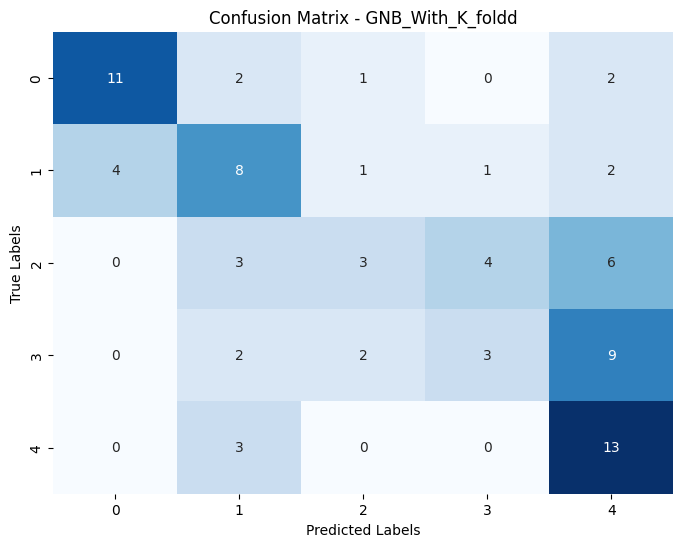

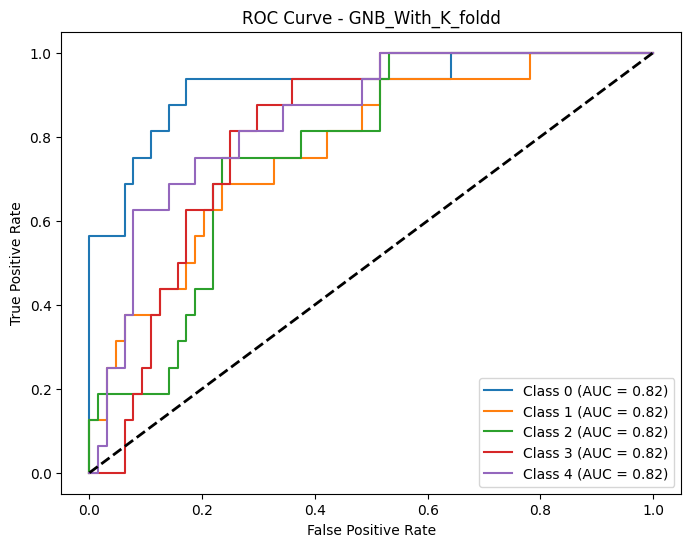

In [32]:
model_GNB = GaussianNB(var_smoothing=9.910359183938845e-07)
model_GNB.fit(x_train, y_train)
model_GNB_with = GaussianNB(var_smoothing=9.910359183938845e-07)
model_GNB_with.fit(X_train, Y_train)

y_prob_GNB = model_GNB.predict_proba(x_test)  # Для GaussianNB
y_prob_GNB_withh = model_GNB_with.predict_proba(X_test)

y_pred_GNB=model_GNB.predict(x_test)
Y_pred_GNB_with=model_GNB_with.predict(X_test)


# Функция для вычисления и отображения метрик
def evaluate_model(y_test, y_pred, y_prob, model_name, num_classes):
    print(f"Оценка модели: {model_name}")
    
    accuracy = accuracy_score(y_test, y_pred)
    precision_macro = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall_macro = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1_macro = f1_score(y_test, y_pred, average='macro', zero_division=0)
    precision_weighted = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall_weighted = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1_weighted = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (macro): {precision_macro:.4f}")
    print(f"Recall (macro): {recall_macro:.4f}")
    print(f"F1 (macro): {f1_macro:.4f}")
    print(f"Precision (weighted): {precision_weighted:.4f}")
    print(f"Recall (weighted): {recall_weighted:.4f}")
    print(f"F1 (weighted): {f1_weighted:.4f}")
    y_test_bin = label_binarize(y_test, classes=range(num_classes))
    roc_auc = roc_auc_score(y_test_bin, y_prob, average='macro', multi_class='ovr')
    print(f"ROC AUC Score (macro): {roc_auc:.4f}")
    
    # Матрица ошибок
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=range(num_classes), yticklabels=range(num_classes))
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
        
    # ROC Curve
    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
        
    plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Диагональ (случайный классификатор)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

num_classes = len(set(y_test))  # Определяем количество классов в задаче
evaluate_model(y_test, y_pred_GNB, y_prob_GNB, 'GaussianNB', num_classes)

evaluate_model(Y_test, Y_pred_GNB_with, y_prob_GNB_withh, 'GNB_With_K_foldd', num_classes)

Модели с методом k-fold2

Метрики всех моделей

Оценка модели: GaussianNB
Accuracy: 0.4313
Precision (macro): 0.4193
Recall (macro): 0.4313
F1 (macro): 0.4058
Precision (weighted): 0.4193
Recall (weighted): 0.4313
F1 (weighted): 0.4058
ROC AUC Score (macro): 0.7899


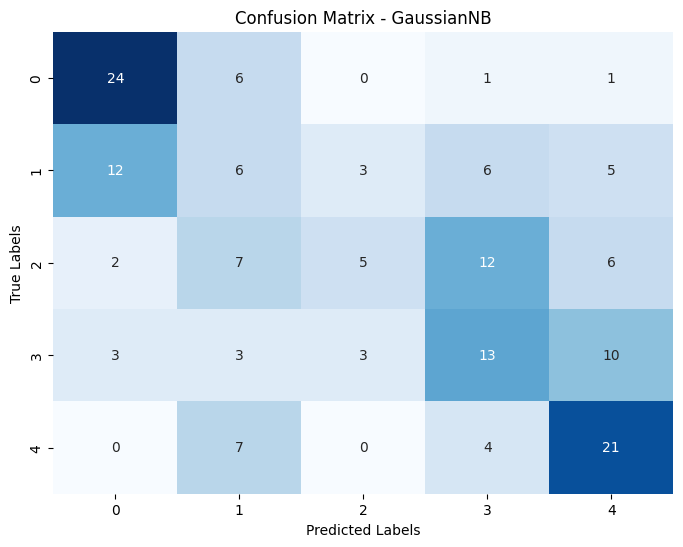

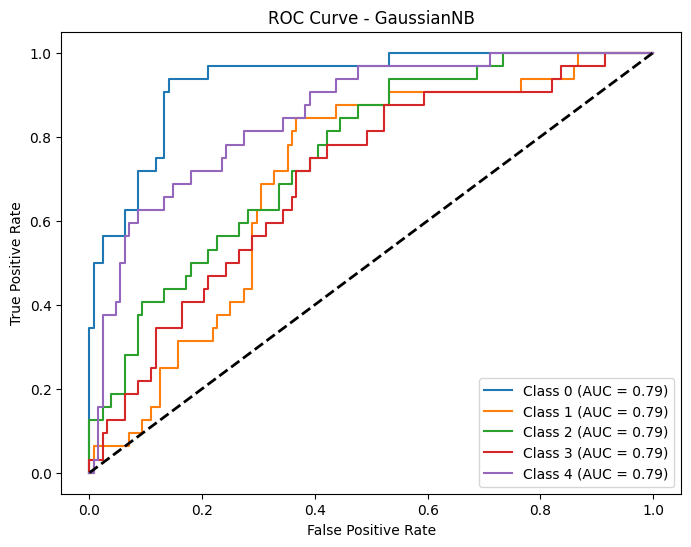

Оценка модели: KNeighbors
Accuracy: 0.7438
Precision (macro): 0.7320
Recall (macro): 0.7438
F1 (macro): 0.7307
Precision (weighted): 0.7320
Recall (weighted): 0.7438
F1 (weighted): 0.7307
ROC AUC Score (macro): 0.9229


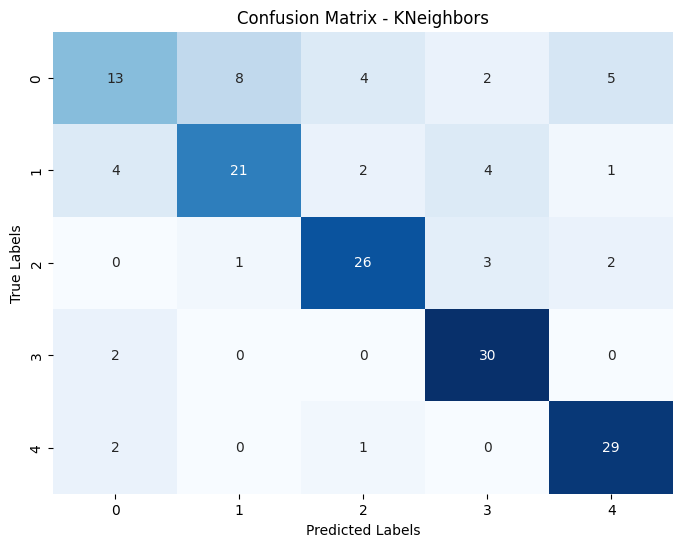

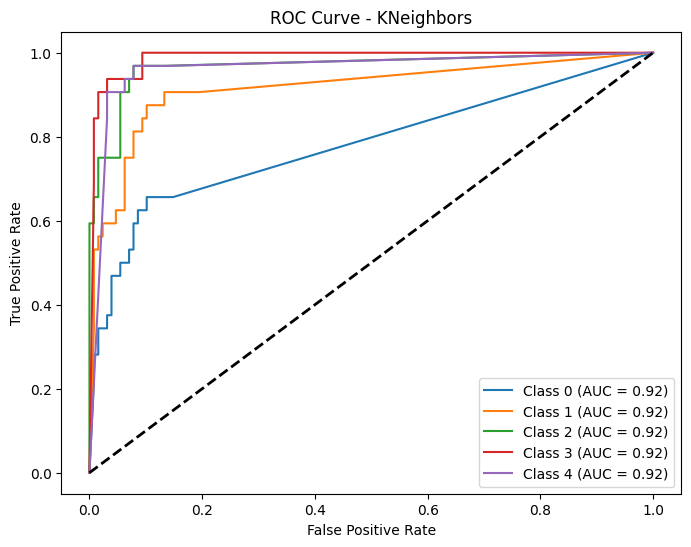

Оценка модели: LogisticRegression
Accuracy: 0.6188
Precision (macro): 0.6160
Recall (macro): 0.6188
F1 (macro): 0.6128
Precision (weighted): 0.6160
Recall (weighted): 0.6188
F1 (weighted): 0.6128
ROC AUC Score (macro): 0.8600


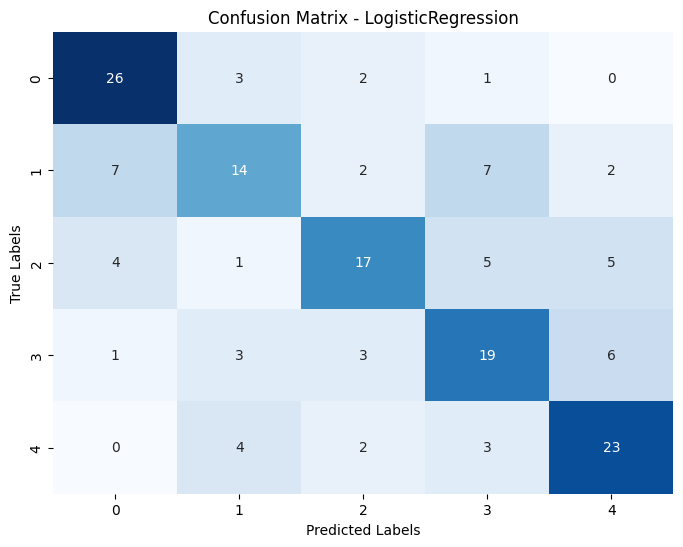

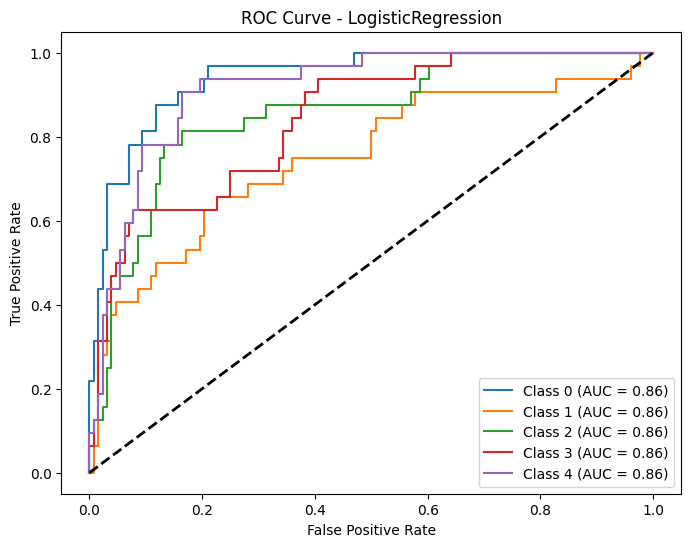

Оценка модели: SVC
Accuracy: 0.6687
Precision (macro): 0.6628
Recall (macro): 0.6687
F1 (macro): 0.6590
Precision (weighted): 0.6628
Recall (weighted): 0.6687
F1 (weighted): 0.6590
ROC AUC Score (macro): 0.8514


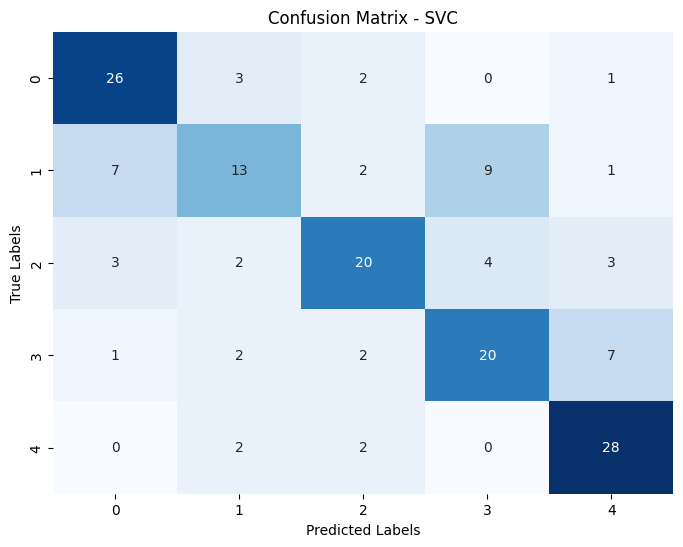

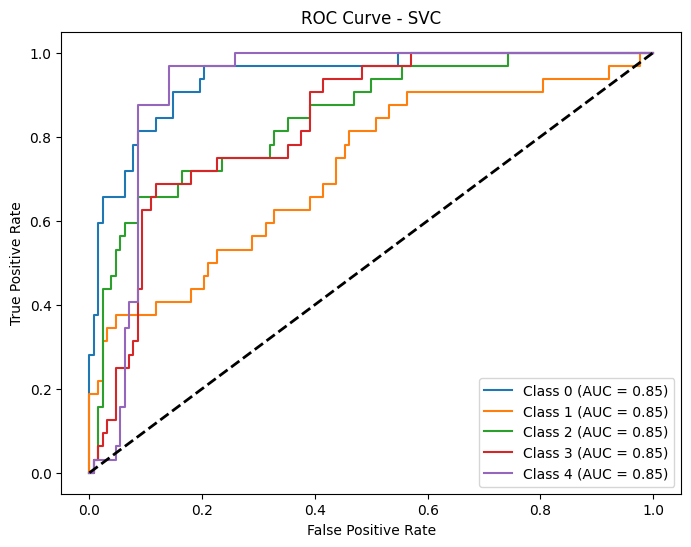

Оценка модели: GNB_With_K_foldd
Accuracy: 0.4750
Precision (macro): 0.4775
Recall (macro): 0.4750
F1 (macro): 0.4466
Precision (weighted): 0.4775
Recall (weighted): 0.4750
F1 (weighted): 0.4466
ROC AUC Score (macro): 0.8234


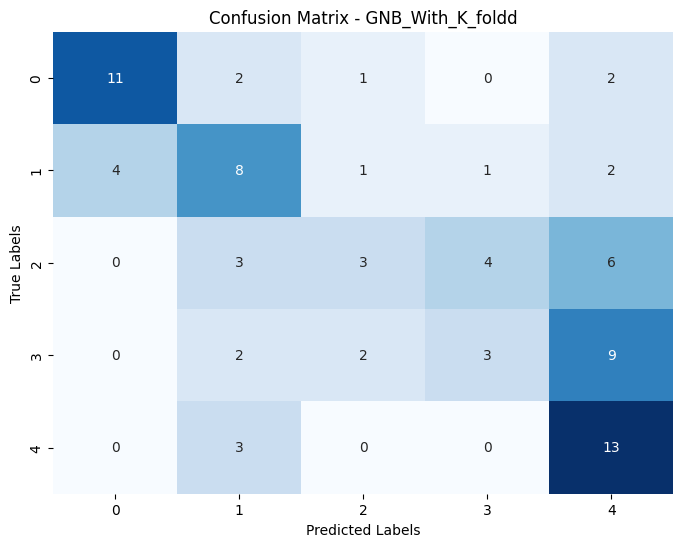

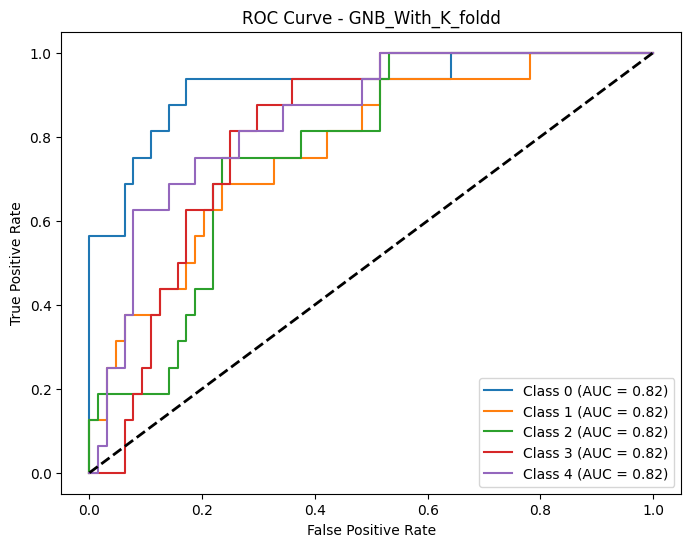

Оценка модели: KNN_With_K_foldd
Accuracy: 0.8500
Precision (macro): 0.8646
Recall (macro): 0.8500
F1 (macro): 0.8397
Precision (weighted): 0.8646
Recall (weighted): 0.8500
F1 (weighted): 0.8397
ROC AUC Score (macro): 0.9460


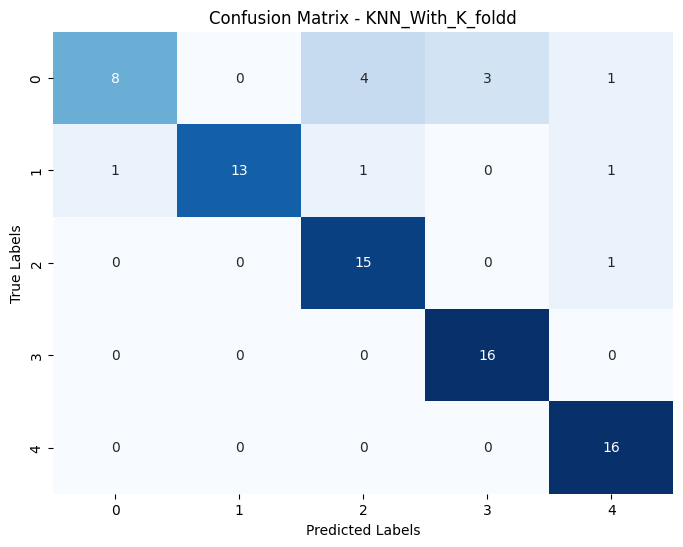

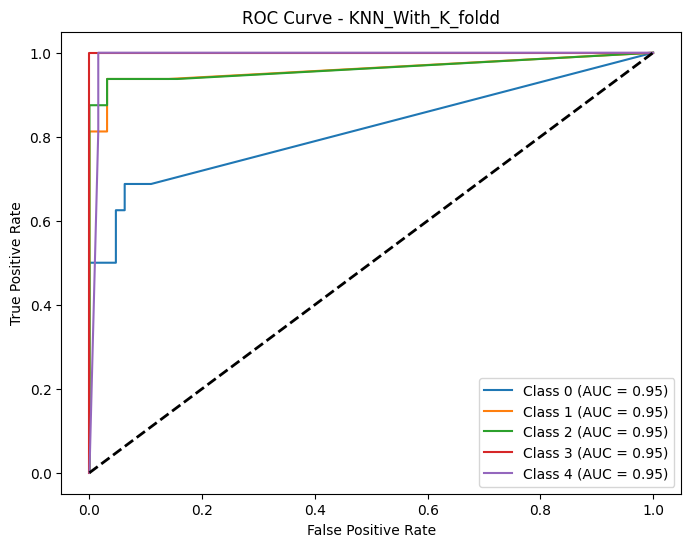

Оценка модели: LR_With_K_foldd
Accuracy: 0.5875
Precision (macro): 0.6019
Recall (macro): 0.5875
F1 (macro): 0.5813
Precision (weighted): 0.6019
Recall (weighted): 0.5875
F1 (weighted): 0.5813
ROC AUC Score (macro): 0.8660


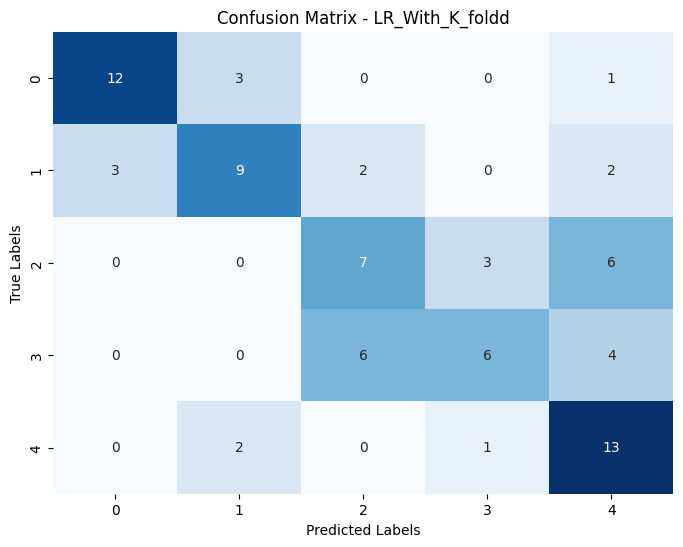

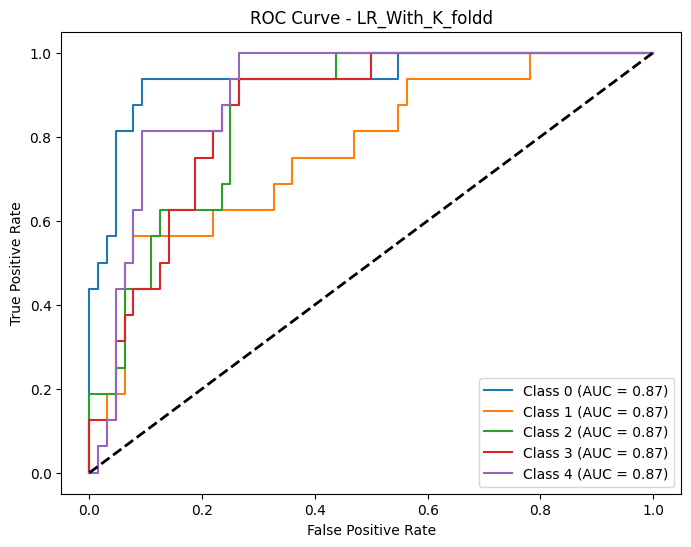

Оценка модели: SVC_With_K_foldd
Accuracy: 0.6375
Precision (macro): 0.6404
Recall (macro): 0.6375
F1 (macro): 0.6305
Precision (weighted): 0.6404
Recall (weighted): 0.6375
F1 (weighted): 0.6305
ROC AUC Score (macro): 0.8664


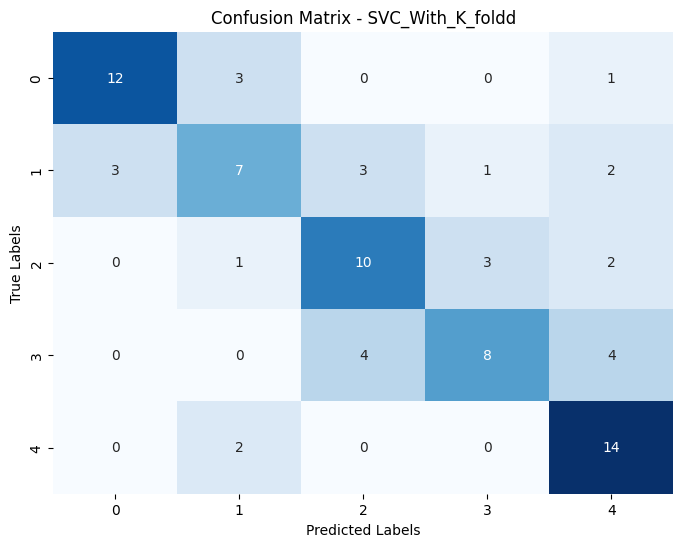

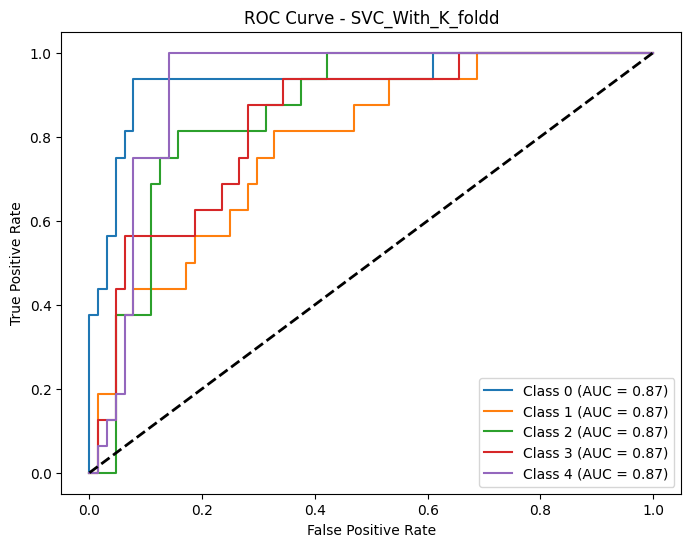

In [33]:
y_prob_GNB = model_GNB.predict_proba(x_test)  # Для GaussianNB
y_prob_KNN = model_KNN.predict_proba(x_test)  # Для KNeighbors
y_prob_LR = model_LR.predict_proba(x_test)  # Для LogisticRegression
y_prob_SVC = model_SVC.decision_function(x_test)  # Для SVC

y_prob_KNN_with = model_KNN_with.predict_proba(X_test)  
y_prob_SVC_withh = model_SVC_with.decision_function(X_test)  
y_prob_LR_with = model_LR_with.predict_proba(X_test)  
y_prob_GNB_withh = model_GNB_with.predict_proba(X_test)  

# Функция для вычисления и отображения метрик
def evaluate_model(y_test, y_pred, y_prob, model_name, num_classes):
    print(f"Оценка модели: {model_name}")
    
    accuracy = accuracy_score(y_test, y_pred)
    precision_macro = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall_macro = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1_macro = f1_score(y_test, y_pred, average='macro', zero_division=0)
    precision_weighted = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall_weighted = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1_weighted = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    cm = confusion_matrix(y_test, y_pred)
    y_test_bin = label_binarize(y_test, classes=range(num_classes))
    roc_auc = roc_auc_score(y_test_bin, y_prob, average='macro', multi_class='ovr')
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (macro): {precision_macro:.4f}")
    print(f"Recall (macro): {recall_macro:.4f}")
    print(f"F1 (macro): {f1_macro:.4f}")
    print(f"Precision (weighted): {precision_weighted:.4f}")
    print(f"Recall (weighted): {recall_weighted:.4f}")
    print(f"F1 (weighted): {f1_weighted:.4f}")
    print(f"ROC AUC Score (macro): {roc_auc:.4f}")
    
    # Матрица ошибок
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=range(num_classes), yticklabels=range(num_classes))
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
        
    # ROC Curve
    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
        
    plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Диагональ (случайный классификатор)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# Оценка всех моделей (например, 3 класса)
num_classes = len(set(y_test))  # Определяем количество классов в задаче
evaluate_model(y_test, y_pred_GNB, y_prob_GNB, 'GaussianNB', num_classes)
evaluate_model(y_test, y_pred_KNN, y_prob_KNN, 'KNeighbors', num_classes)
evaluate_model(y_test, y_pred_LR, y_prob_LR, 'LogisticRegression', num_classes)
evaluate_model(y_test, y_pred_SVC, y_prob_SVC, 'SVC', num_classes)

evaluate_model(Y_test, Y_pred_GNB_with, y_prob_GNB_withh, 'GNB_With_K_foldd', num_classes)
evaluate_model(Y_test, Y_pred_KNN_with, y_prob_KNN_with, 'KNN_With_K_foldd', num_classes)
evaluate_model(Y_test, Y_pred_LR_with, y_prob_LR_with, 'LR_With_K_foldd', num_classes)
evaluate_model(Y_test, Y_pred_SVC_with, y_prob_SVC_withh, 'SVC_With_K_foldd', num_classes)

Пользовательские функции

In [34]:
from metrics_class import user_accuracy, user_precision, user_recall, user_f1_score, user_confusion_matrix_multiclass

Оценка модели: KNeighbors
Accuracy: 0.7438
Precision (macro): 0.7320
Recall (macro): 0.7438
F1 (macro): 0.7307
Precision (weighted): 0.7320
Recall (weighted): 0.7438
F1 (weighted): 0.7307


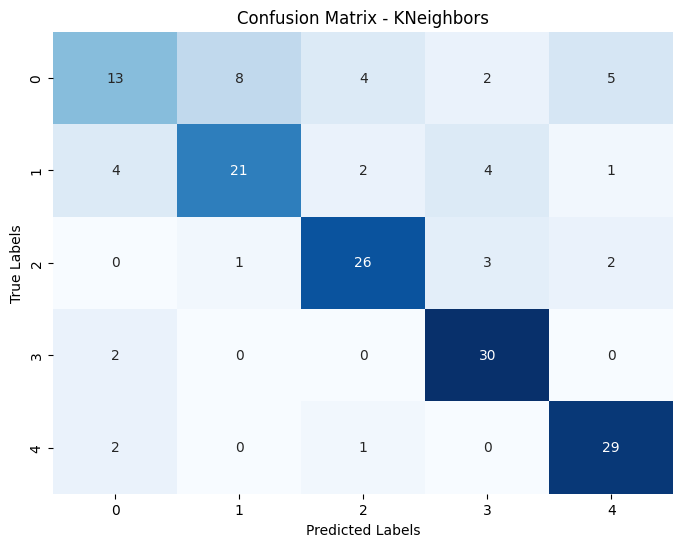

In [35]:
def evaluate_model(y_test, y_pred, y_prob, model_name, num_classes):
    print(f"Оценка модели: {model_name}")

    accuracy = user_accuracy(y_test, y_pred)
    precision_macro = user_precision(y_test, y_pred, average='macro')
    recall_macro = user_recall(y_test, y_pred, average='macro')
    f1_macro = user_f1_score(y_test, y_pred, average='macro')
    precision_weighted = user_precision(y_test, y_pred, average='weighted')
    recall_weighted = user_recall(y_test, y_pred, average='weighted')
    f1_weighted = user_f1_score(y_test, y_pred, average='weighted')
    cm = user_confusion_matrix_multiclass(y_test, y_pred, unique_classes)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (macro): {precision_macro:.4f}")
    print(f"Recall (macro): {recall_macro:.4f}")
    print(f"F1 (macro): {f1_macro:.4f}")
    print(f"Precision (weighted): {precision_weighted:.4f}")
    print(f"Recall (weighted): {recall_weighted:.4f}")
    print(f"F1 (weighted): {f1_weighted:.4f}")
    
    # Матрица ошибок
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=range(num_classes), yticklabels=range(num_classes))
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Оценка всех моделей (например, 3 класса)
num_classes = len(set(y_test))  # Определяем количество классов в задаче
evaluate_model(y_test, y_pred_KNN, y_prob_KNN, 'KNeighbors', num_classes)

Оценка модели с стандартными функциями: KNeighbors
- Accuracy: 0.7812
- Precision (macro): 0.7764
- Recall (macro): 0.7812
- F1 (macro): 0.7659
- Precision (weighted): 0.7764
- Recall (weighted): 0.7812
- F1 (weighted): 0.7659

Свой KNN

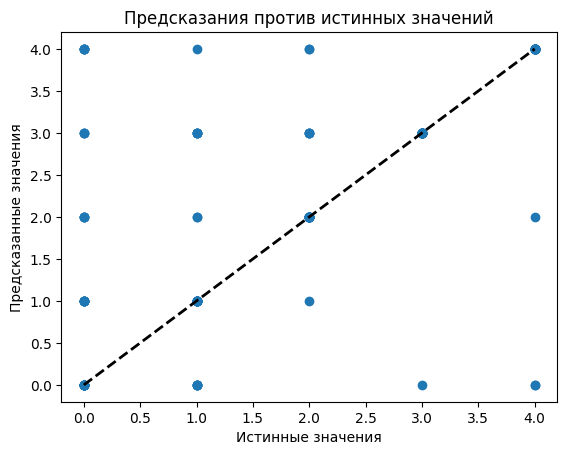

In [36]:
from User_KNN import KNNClassifier
user_model_knn = KNNClassifier(k=3, distance_metric='manhattan')
user_model_knn.fit(x_train, y_train)

y_pred = user_model_knn.predict(x_test)

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Предсказания против истинных значений')
plt.show()

Оценка модели: User_KNeighbors
Accuracy: 0.7312
Precision: 0.7217
Recall: 0.7312
F1: 0.7166


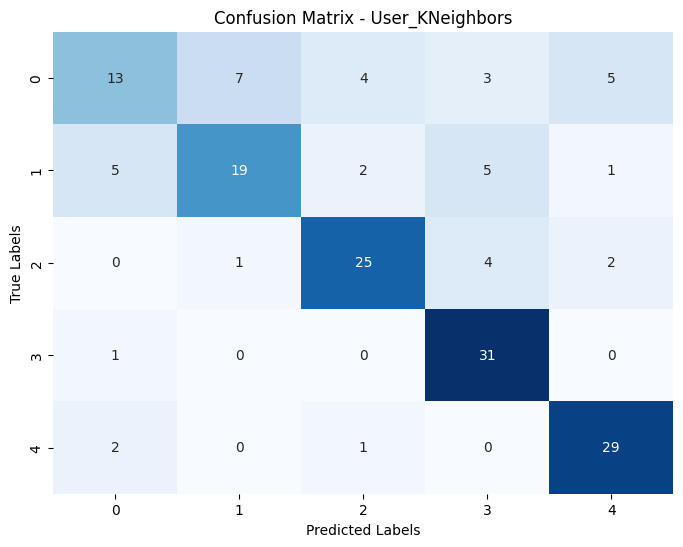

In [37]:
def evaluate_model(y_test, y_pred, model_name, num_classes):
    print(f"Оценка модели: {model_name}")
    
    accuracy = user_accuracy(y_test, y_pred)
    precision = user_precision(y_test, y_pred)
    recall = user_recall(y_test, y_pred)
    f1 = user_f1_score(y_test, y_pred)
    cm = user_confusion_matrix_multiclass(y_test, y_pred, unique_classes)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1: {f1:.4f}")
    
    # Матрица ошибок
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=range(num_classes), yticklabels=range(num_classes))
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Оценка всех моделей (например, 3 класса)
num_classes = len(set(y_test))  # Определяем количество классов в задаче
evaluate_model(y_test, y_pred, 'User_KNeighbors', num_classes)

Оценка модели: KNeighbors
- Accuracy: 0.7812
- Precision (macro): 0.7749
- Recall (macro): 0.7812
- F1 (macro): 0.7693
- Precision (weighted): 0.7749
- Recall (weighted): 0.7812
- F1 (weighted): 0.7693

Таблицы

In [38]:
y_train_pred_sklearn_knn = model_KNN.predict(x_train)
y_train_pred_user_knn = user_model_knn.predict(x_train)

In [39]:
import pandas as pd

# Предположим, что у вас есть предсказания для обучающей выборки:
# y_train_pred_user_knn = user_model_knn.predict(x_train)
# y_train_pred_sklearn_knn = sklearn_knn_model.predict(x_train)  # Замените на ваш sklearn KNN

# Создаем DataFrame с метриками
metrics_df = pd.DataFrame({
    'Классификатор': ['User_KNN', 'Sklearn_KNN'],
    
    # Метрики для тестовых данных
    'Test Accuracy': [
        round(user_accuracy(y_test, y_pred), 2),  # Округляем до 2 знаков
        round(user_accuracy(y_test, y_pred_KNN), 2)
    ],
    'Test Precision (macro)': [
        user_precision(y_test, y_pred, average='macro'),
        user_precision(y_test, y_pred_KNN, average='macro')
    ],
    'Test Recall (macro)': [
        user_recall(y_test, y_pred, average='macro'),
        user_recall(y_test, y_pred_KNN, average='macro')
    ],
    'Test F1 (macro)': [
        user_f1_score(y_test, y_pred, average='macro'),
        user_f1_score(y_test, y_pred_KNN, average='macro')
    ],
    
    # Метрики для обучающих данных
    'Train Accuracy': [
        round(user_accuracy(y_train, y_train_pred_user_knn), 2),
        round(user_accuracy(y_train, y_train_pred_sklearn_knn), 2)
    ],
    'Train Precision (macro)': [
        user_precision(y_train, y_train_pred_user_knn, average='macro'),
        user_precision(y_train, y_train_pred_sklearn_knn, average='macro')
    ],
    'Train Recall (macro)': [
        user_recall(y_train, y_train_pred_user_knn, average='macro'),
        user_recall(y_train, y_train_pred_sklearn_knn, average='macro')
    ],
    'Train F1 (macro)': [
        user_f1_score(y_train, y_train_pred_user_knn, average='macro'),
        user_f1_score(y_train, y_train_pred_sklearn_knn, average='macro')
    ]
})

# Отображаем DataFrame
display(metrics_df)

,Классификатор,Test Accuracy,Test Precision (macro),Test Recall (macro),Test F1 (macro),Train Accuracy,Train Precision (macro),Train Recall (macro),Train F1 (macro)
0,User_KNN,0.73,0.721743,0.73125,0.716626,0.9,0.89621,0.895312,0.892792
1,Sklearn_KNN,0.74,0.731988,0.74375,0.730727,1.0,1.00000,1.000000,1.000000


In [40]:
import pandas as pd
from typing import List, Dict, Union

def compare_models_custom_data(
    models: List[Dict[str, Union[str, object]]],
    round_digits: int = 2
) -> pd.DataFrame:
    results = []

    for model_info in models:
        # Получаем данные для текущей модели
        X_train = model_info['X_train']
        y_train = model_info['y_train']
        X_test = model_info['X_test']
        y_test = model_info['y_test']

        # Делаем предсказания
        y_train_pred = model_info['model'].predict(X_train)
        y_test_pred = model_info['model'].predict(X_test)

        # Вычисляем метрики для тестовых данных
        test_metrics = {
            "Test Accuracy": round(user_accuracy(y_test, y_test_pred), round_digits),
            "Test Precision": user_precision(y_test, y_test_pred, average="macro"),
            "Test Recall)": user_recall(y_test, y_test_pred, average="macro"),
            "Test F1": user_f1_score(y_test, y_test_pred, average="macro"),
        }

        # Вычисляем метрики для обучающих данных
        train_metrics = {
            "Train Accuracy": round(user_accuracy(y_train, y_train_pred), round_digits),
            "Train Precision": user_precision(y_train, y_train_pred, average="macro"),
            "Train Recall": user_recall(y_train, y_train_pred, average="macro"),
            "Train F1": user_f1_score(y_train, y_train_pred, average="macro"),
        }

        # Добавляем в результаты
        model_result = {
            "Model": model_info['name'],
            **test_metrics,
            **train_metrics,
        }
        results.append(model_result)

    return pd.DataFrame(results)

In [41]:
user_model_knn_with = KNNClassifier(k=3, distance_metric='manhattan')
user_model_knn_with.fit(X_train, Y_train)

In [42]:
# Подготовка данных моделей
models_info = [
    {
        "name": "KNN",
        "model": model_KNN,
        "X_train": x_train,
        "y_train": y_train,
        "X_test": x_test,
        "y_test": y_test,
    },
    {
        "name": "KNN With K fold",
        "model": model_KNN_with,
        "X_train": X_train,
        "y_train": Y_train,
        "X_test": X_test,
        "y_test": Y_test,
    },
    {
        "name": "User KNN",
        "model": user_model_knn,
        "X_train": x_train,
        "y_train": y_train,
        "X_test": x_test,
        "y_test": y_test,
    },
    {
        "name": "User KNN With K fold",
        "model": user_model_knn_with,
        "X_train": X_train,
        "y_train": Y_train,
        "X_test": X_test,
        "y_test": Y_test,
    },
    {
        "name": "GNB",
        "model": model_GNB,
        "X_train": x_train,
        "y_train": y_train,
        "X_test": x_test,
        "y_test": y_test,
    },
    {
        "name": "GNB With K fold",
        "model": model_GNB_with,
        "X_train": X_train,
        "y_train": Y_train,
        "X_test": X_test,
        "y_test": Y_test,
    },
    {
        "name": "LR",
        "model": model_LR,
        "X_train": x_train,
        "y_train": y_train,
        "X_test": x_test,
        "y_test": y_test,
    },
    {
        "name": "LR With K fold",
        "model": model_LR_with,
        "X_train": x_train,
        "y_train": y_train,
        "X_test": x_test,
        "y_test": y_test,
    },
    {
        "name": "SVC with linear",
        "model": model_SVC,
        "X_train": x_train,
        "y_train": y_train,
        "X_test": x_test,
        "y_test": y_test,
    },
    {
        "name": "SVC with linear and With K fold",
        "model": model_SVC_with,
        "X_train": X_train,
        "y_train": Y_train,
        "X_test": X_test,
        "y_test": Y_test,
    },
    {
        "name": "SVC with nuclear functions",
        "model": model_SVM,
        "X_train": x_train,
        "y_train": y_train,
        "X_test": x_test,
        "y_test": y_test,
    },
    {
        "name": "SVC with nuclear functions and with K fold",
        "model": model_SVM_with,
        "X_train": X_train,
        "y_train": Y_train,
        "X_test": X_test,
        "y_test": Y_test,
    }
]


# Создаем DataFrame с метриками
metrics_df = compare_models_custom_data(models_info, round_digits=2)
display(metrics_df)

,Model,Test Accuracy,Test Precision,Test Recall),Test F1,Train Accuracy,Train Precision,Train Recall,Train F1
0,KNN,0.74,0.731988,0.74375,0.730727,1.00,1.000000,1.000000,1.000000
1,KNN With K fold,0.85,0.864620,0.85000,0.839691,1.00,1.000000,1.000000,1.000000
2,User KNN,0.73,0.721743,0.73125,0.716626,0.90,0.896210,0.895312,0.892792
3,User KNN With K fold,0.85,0.865556,0.85000,0.839990,0.90,0.903638,0.901389,0.897994
4,GNB,0.43,0.419258,0.43125,0.405833,0.52,0.525905,0.525000,0.508272
5,GNB With K fold,0.48,0.477520,0.47500,0.446560,0.50,0.500338,0.497222,0.475973
6,LR,0.62,0.615961,0.61875,0.612785,0.60,0.588287,0.598437,0.588949
7,LR With K fold,0.67,0.670613,0.66875,0.663726,0.58,0.566558,0.576562,0.566667
8,SVC with linear,0.67,0.662792,0.66875,0.658987,0.64,0.633693,0.637500,0.629914
9,SVC with linear and With K fold,0.64,0.640412,0.63750,0.630478,0.64,0.638004,0.638889,0.630937


*Вывод*

*При работе с датасетом Heart Disease:*

- Наиболее эффективной моделью оказалась KNN с выборкой взятой с помощью K fold. Показатель Accuracy 0.83, Precision 0.83, Recall 0.83, F1 0.82, эти показатели являются максимальными среди моделей GNB, LR, SVC.
- Выборка взятая с помощью K fold улучшила результаты предсказания, однако это явление не постоянно и при повторном запуске результаты k fold не будет отличаться от hold-out.
- Собственная реализация KNN оказалась менее эффективной в сравнении с эталонным классификатором KNN из Scikit-learn.
- По метрикам можно увидеть, что модели KNN и SVM имеют эффект переобучения. Этот эффект можно уменьшить, если уменьшить гиперпараметры этих моделей или уменьшить количество обрабатываемых признаков. Попытка исправить переобучение с использование 10 степени k-fold не привело к уменьшению переобучения.

In [43]:
import pickle

with open('RGR_model_KNN.pkl', 'wb') as f:
    pickle.dump(model_KNN_with, f)